# Data Science Challenge

In [21]:
# To install packages that aren't installed by default, uncomment the last two lines of this cell 
# and replace <package list> with a list of packages.
# This will ensure the notebook has all the dependencies and works everywhere.

import sys
!{sys.executable} -m pip install <package list>

The syntax of the command is incorrect.


In [22]:
#Libraries
import pandas as pd
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every job posting.
`title` | The title of the job offered. For example, Marketing Intern, Developer, etc.
`location` | The geographical location of the job.
`department` | The department of the job. For example, Sales, etc.
`industry` | The industry of the job. For example, IT, Health, etc.
`salary_range` | The salary range offered by the company (in \$\$).
`work_from_home` | The flag indicates if the job allows work from home..
`company_logo` | The flag indicates if the company offering the job has a registered logo.
`screening_round` | The flag indicates if there will be a screening round for candidates applying for the job.
`employment_type` | The type of employment offered by the company. For example, Full-time, Part-time, etc.
`required_experience` | The minimum experience required for the job. (in years).
`required_education` | The minimum required education for the job. For example, Master's Degree, Bachelor's Degree, etc.
`is_authentic` | The flag indicates if the job posting is authentic or not. Values are 1 (authentic) and 0 (not authentic).

## Data Wrangling & Visualization

In [23]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [24]:
data.head()

#data.head() is a way to peek at the first few rows of a DataFrame, just to get a sense of structure of data

,id,title,location,department,industry,salary_range,work_from_home,company_logo,screening_round,employment_type,required_experience,required_education,is_authentic
0,17693,Administrative Assistant,Sacramento,Information Technology,Education Management,34000-42000,0,0,0,Full-time,Entry level,NaN,0
1,14476,Junior Lifestyle Consultant,Athens,Administrative,Telecommunications,NaN,0,1,1,Full-time,Not Applicable,Bachelor's Degree,1
2,14799,Licensed Clinician,Athens,Other,Financial Services,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,1
3,10409,English Teacher Abroad,Sacramento,Engineering,Education Management,NaN,0,1,1,Contract,NaN,Bachelor's Degree,1
4,13359,Senior Sales Executive - West,San Francisco,Administrative,Consumer Services,NaN,1,1,1,Full-time,Executive,Bachelor's Degree,1


In [25]:
#Explore columns
data.columns

Index(['id', 'title', 'location', 'department', 'industry', 'salary_range',
       'work_from_home', 'company_logo', 'screening_round', 'employment_type',
       'required_experience', 'required_education', 'is_authentic'],
      dtype='object')

In [26]:
#Description
data.describe()

#data.describe() returns statistics on each column

,id,work_from_home,company_logo,screening_round,is_authentic
count,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000
mean,9449.487512,0.050450,0.667832,0.434066,0.692807
std,5469.589566,0.218925,0.471109,0.495757,0.461445
min,4.000000,0.000000,0.000000,0.000000,0.000000
25%,4897.500000,0.000000,0.000000,0.000000,0.000000
50%,8933.000000,0.000000,1.000000,0.000000,1.000000
75%,14299.500000,0.000000,1.000000,1.000000,1.000000
max,17873.000000,1.000000,1.000000,1.000000,1.000000


## Visualization, Modeling, Machine Learning

Build a model that can predicts the authenticity of a job posting and identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [27]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,title,location,department,industry,salary_range,work_from_home,company_logo,screening_round,employment_type,required_experience,required_education
0,3911,linux Engineer,Sacramento,Health Care Provider,Oil & Energy,NaN,0,1,0,Contract,NaN,NaN
1,2808,Art Director (Freelance to Full-time),Sacramento,Engineering,Marketing and Advertising,NaN,0,1,1,Full-time,Associate,Bachelor's Degree
2,17644,Daily Money Team Representative,London,Customer Service,Internet,NaN,1,1,1,Part-time,NaN,High School or equivalent
3,11629,Sales Professional- SMB (Full-Time),New York,Marketing,Computer Software,21600-31200,0,1,0,Full-time,Entry level,High School or equivalent
4,7269,Mobile Developer,Sacramento,Design,Financial Services,NaN,0,1,0,NaN,NaN,NaN


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#returns python list of all features/columns in string format
features = data.columns.tolist()
#remove our y from our dataset
features.remove("is_authentic")

target = "is_authentic"



#Preprocess categorical features
categorical_features = ["id", "title", "location", "department", "industry", "salary_range",
                        "employment_type", "required_experience", "required_education"]

print(data.columns)
print(categorical_features)

#we have to encode our string features into encoded integers so we can run our randomforest model on the data
label_encoders = {}   #create empty dictionary to store encoded feature values
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()  #creating new key-value pair, with labelencoder object as the value and the feature as the key
    data[feature] = label_encoders[feature].fit_transform(data[feature].astype(str)) 
#first fits the labelencoder object to the string/categorical data to build a mapping, then uses mapping learned during fitting to transform
#the data in the feature column


numerical_features = ["work_from_home", "company_logo", "screening_round"]
#deal with missing values by just replacing with median value of that column
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].median())


print(data.columns)

#Split data into train and validation sets
X, y = data[features], data[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

#Scale/normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit the scaler mapping and use mapping to standardize Xtrain
X_val_scaled = scaler.transform(X_val)  # applies the mean/std dev learned from train scaling to standardize validation set

#Finally, train the model, I picked a RandomForestClassifier due to the categorical nature of the data, 
#also ensemble method so it can handle class imbalance better.
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

#Visualize an accuracy score on the validation set
y_pred = model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

Index(['id', 'title', 'location', 'department', 'industry', 'salary_range',
       'work_from_home', 'company_logo', 'screening_round', 'employment_type',
       'required_experience', 'required_education', 'is_authentic'],
      dtype='object')
['id', 'title', 'location', 'department', 'industry', 'salary_range', 'employment_type', 'required_experience', 'required_education']
Index(['id', 'title', 'location', 'department', 'industry', 'salary_range',
       'work_from_home', 'company_logo', 'screening_round', 'employment_type',
       'required_experience', 'required_education', 'is_authentic'],
      dtype='object')
Accuracy: 0.9002493765586035




**The management wants to know what are the most important features for your model.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


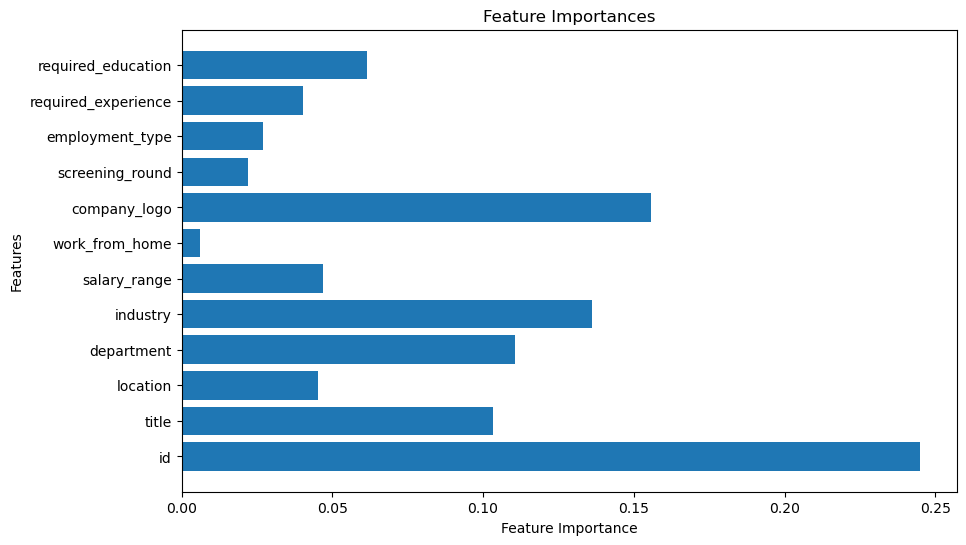

In [29]:
import matplotlib.pyplot as plt

importances = model.feature_importances_ # this is an attribute of the model that returns an array containing the importance value of each feature
# it measure "mean impurity" or how well a feature splits data at nodes across all trees, it then returns a np array of these rankings for each feature

plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances)  #barh because regular bar is hard to see all the feature names
plt.yticks(range(len(features)), features)  #takes 2 array or list items, x is the number of ticks, and y is the label for the ticks
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [30]:

for feature in categorical_features:
    test_data[feature] = label_encoders[feature].fit_transform(test_data[feature].astype(str))
#Uses the previous labelencoder objects form the training loop -> first fits the labelencoder object to the string/categorical data to build a mapping, 
#then uses mapping learned during fitting to transform the data in the feature column
#.astype(str) just ensures the categorical data in test_data[feature] is in string format.

test_data[numerical_features] = data[numerical_features].fillna(data[numerical_features].median())
#same as above, filling NaN with median of column

X_test_scaled = scaler.transform(test_data[features])
# applies the mean/std dev learned from train scaling to standardize test set


test_predictions = model.predict(X_test_scaled)

submissions_df = pd.DataFrame({'id': test_data['id'], 'is_authentic': test_predictions})

submissions_df.to_csv('submissions.csv',index=False)

The model I trained has above a 90% accuracy on my validation set in determining if a job posting is authentic or not. This is a good starting point, however for deployment, we would seek an even higher accuracy through further hyperparameter tuning, perhaps trying different models, regularization, or perhaps even feature engineering among other things.

In response to management's inquiry on which are the most important features, I have visualized above, which features the model has deemed most important. Note, I was confused on why I was being asked to visualize the 20 most important features when in my view we really only had 13 features total id, title, location, department, industry, salary_range, work_from_home, company_logo, screening_round, employment_type, required_experience, required_education, is_authentic. So, I chose to visualize all the features in order of importance in a bar graph above. 

You can see upon inspection the

Top 5 most important features
1. id
2. company_logo
3. industry
4. department
5. title 

Note: Due to not know how id was generated I chose to include id in the training process, however if id was simply assigned by whoever created the training dataset just to distinguish the data, I would say we should train the model excluding id. I actually tried this approach but due to having a lower accuracy i opted to include id for now.


> #### Task:
- **Submit the predictions on the test dataset using the optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `is_authentic` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **is_authentic**

---